## **CARGA DE DATOS**

In [1]:
# Importamos librerias

import pandas as pd
import numpy as np

In [2]:
# Leemos los dos csv

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
# Analisis del df1

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
# Analisis del df2

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
# Unimos df1 y df2 a través del id de las peliculas

df1.columns = ['id', 'tittle', 'cast', 'crew']
df2 = df2.merge(df1, on = 'id')

In [6]:
# Comprobacion de la union de las dos tablas

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

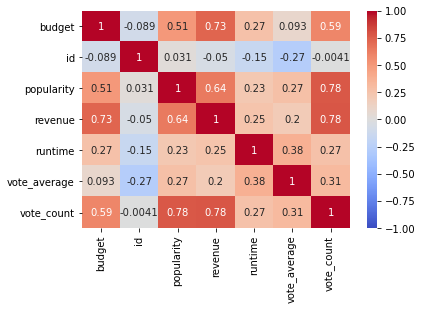

In [7]:
import seaborn as sns

sns.heatmap(df2.corr(), vmin = -1, annot = True, cmap = 'coolwarm');

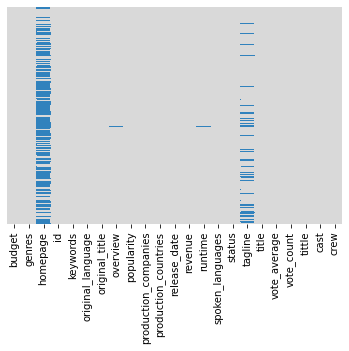

In [8]:
sns.heatmap(df2.isnull(), yticklabels = False, cmap='tab20c_r', cbar = False);

In [9]:
df2.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

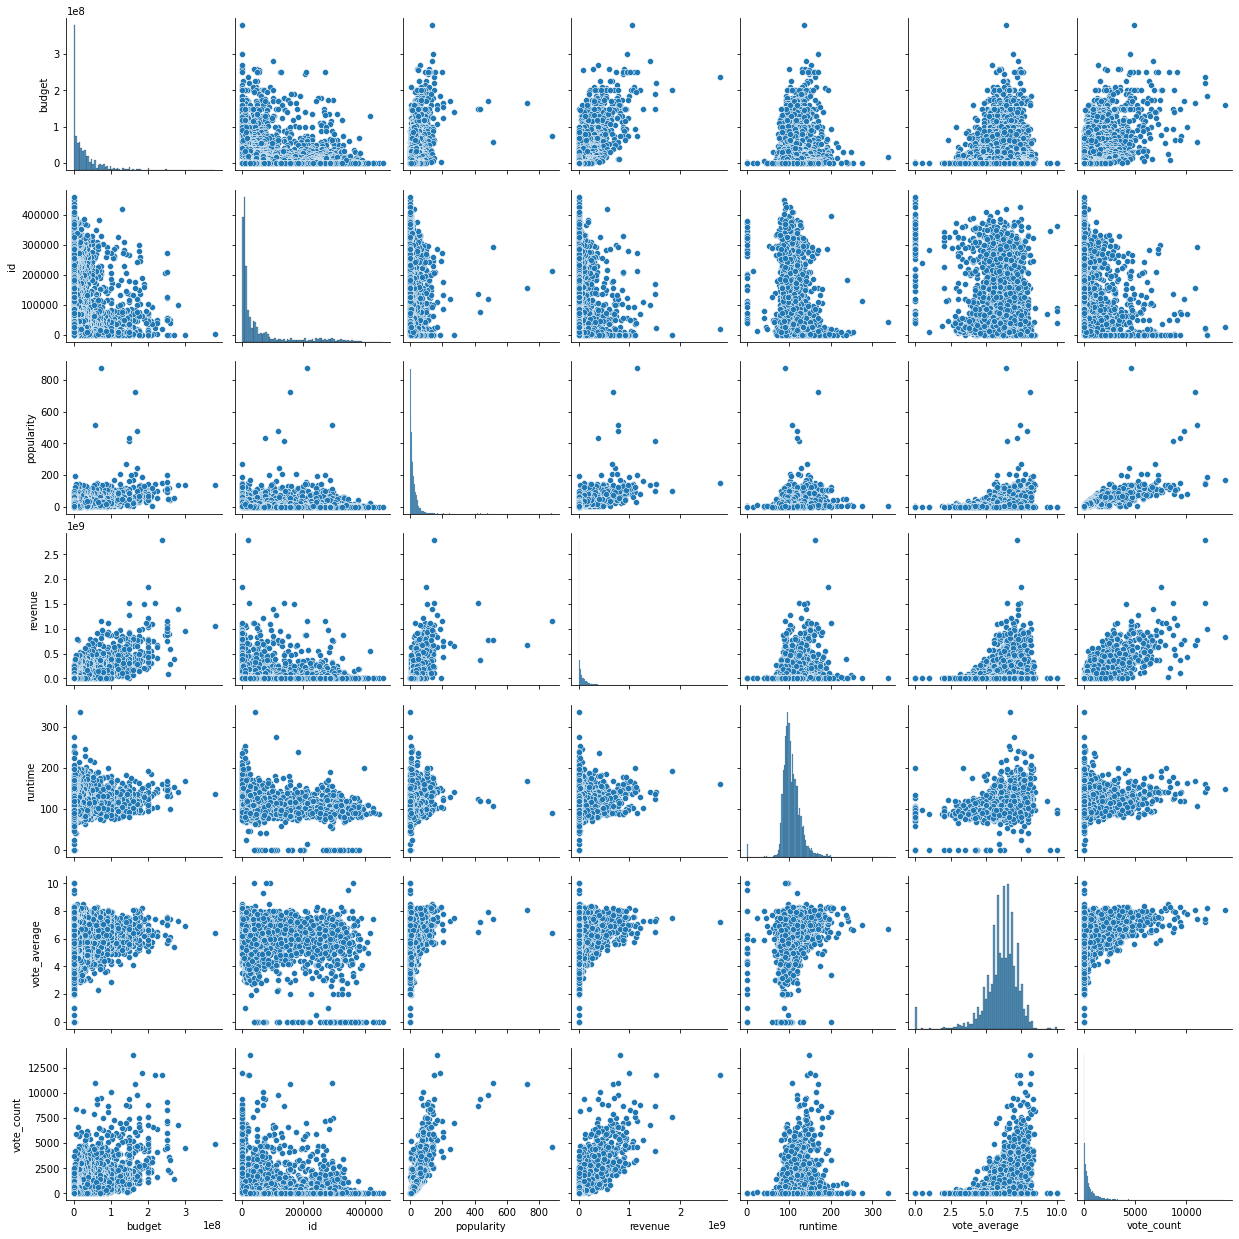

In [10]:
sns.pairplot(df2);

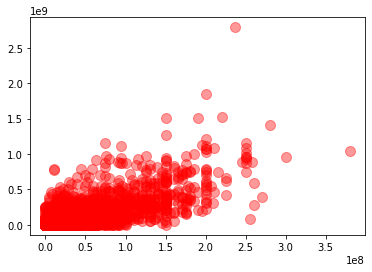

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df2['budget'], df2['revenue'], s=100, c="red", alpha=0.4)


In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df2, title="Pandas Profiling Report")
profile

## **ML**

Sistemas de recomendación:
- **Filtrado demográfico:** ofrecen recomendaciones generalizadas a cada usuario, según la popularidad de la película y / o el género. El sistema recomienda las mismas películas a usuarios con características demográficas similares. Dado que cada usuario es diferente, este enfoque se considera demasiado simple. La idea básica detrás de este sistema es que las películas que son más populares y aclamadas por la crítica tendrán una mayor probabilidad de gustar a la audiencia promedio.

- **Filtro basado en el contenido:** Sugieren artículos similares basados en un artículo en particular. Este sistema utiliza metadatos de elementos, como género, director, descripción, actores, etc. para las películas, para hacer estas recomendaciones. La idea general detrás de estos sistemas de recomendación es que si a una persona le gustó un elemento en particular, también le gustará un elemento que sea similar a él.

- **Filtro de colaboración:** Este sistema empareja a las personas con intereses similares y proporciona recomendaciones basadas en este emparejamiento. Los filtros de colaboración no requieren metadatos de los artículos como sus homólogos basados en el contenido.




### Filtrado Demográfico

Necesitamos una métrica para anotar o calificar la película

In [13]:
# Para ello se calcula la media de las notas medias de todas las peliculas

nota_media = df2['vote_average'].mean()
nota_media

6.092171559442011

Así, la puntuación media de todas las películas es aproximadamente 6 en una escala de 10. El siguiente paso es determinar un valor apropiado para m, el mínimo de votos requeridos para aparecer en la tabla. Usaremos el 90 por ciento como límite. En otras palabras, para que una película aparezca en las listas, debe tener más votos que al menos el 90% de las películas de la lista.

In [14]:
# Calculo de votos minimos para aparecer en la tabla

minimo_votos = df2['vote_count'].quantile(0.9)
minimo_votos

1838.4000000000015

In [15]:
# Filtramos las peliculas con los votos y notas

filt_peliculas = df2.copy().loc[df2['vote_count'] >= minimo_votos]
filt_peliculas

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4291    1200000  [{"id": 27, "name": "Horror"}, {"id": 9648, "n...   
4300    1200000  [{"id": 80, "name": "Crime"}, {"id": 53, "name...   
4302    1200000                    [{"id": 37, "name": "Western"}]   
4337    1300000  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   
4602     350000                      [{"id": 18, "name": "Drama"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4291                                                NaN     176   
4300                                                NaN     500   
4302  http://www.mgm.com/#/our-titles/766/The-Good,-...     429   
4337                                                NaN     103   
4602                                                NaN     389   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4291  [{"id": 1366, "name": "shotgun"}, {"id": 13000...                en   
4300  [{"id": 2052, "name": "traitor"}, {"id": 6099,...                en   
4302  [{"id": 801, "name": "bounty hunter"}, {"id": ...                it   
4337  [{"id": 422, "name": "vietnam veteran"}, {"id"...                en   
4602  [{"id": 934, "name": "judge"}, {"id": 1417, "n...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4291                                       Saw   
4300                            Reservoir Dogs   
4302           Il buono, il brutto, il cattivo   
4337                               Taxi Driver   
4602                              12 Angry Men   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4291  Obsessed with teaching his victims the value o...   63.655973   
4300  A botched robbery indicates a police informant...   66.925866   
4302  While the Civil War rages between the Union an...   88.377076   
4337  A mentally unstable Vietnam War veteran works ...   58.845025   
4602  The defense and the prosecution have rested an... 

In [16]:
# Conocer el tamaño de la nueva tabla

filt_peliculas.shape

(481, 23)

Hay un total de 481 películas que califican para estar en esta lista. Ahora, necesitamos calcular nuestra métrica para cada película calificada.

![](https://image.ibb.co/jYWZp9/wr.png)

In [17]:
# Creamos una nueva función para calcular el valor (weighted rating)

def calificacion_ponderada(x, minimo_votos = minimo_votos, nota_media = nota_media):
    number_votes = x['vote_count']
    average_rating = x['vote_average']
    
    return (number_votes/(number_votes + minimo_votos) * average_rating) + (minimo_votos/(minimo_votos + number_votes) * nota_media)
    

In [18]:
# Define una nueva feature "score" y calcula su valor con "calificacion_ponderada()"

filt_peliculas['score'] = filt_peliculas.apply(calificacion_ponderada, axis = 1)

In [19]:
# Comprobacion de que se ha añadido la nueva feature

filt_peliculas.shape

(481, 24)

Por último, ordenamos el DataFrame en función de la score feature, sacando el título, el recuento de votos, el promedio de votos y la puntuación ponderada o puntuación de las 10 mejores películas.

In [20]:
# Ordenamos las peliculas en función del score anteriormente calculado

filt_peliculas = filt_peliculas.sort_values('score', ascending = False)

In [21]:
# Imprimimos el top 10 de peliculas

filt_peliculas[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  7.851236  
95    7.809479  
809   7.803188  
329   7.727243  
1990  7.697884

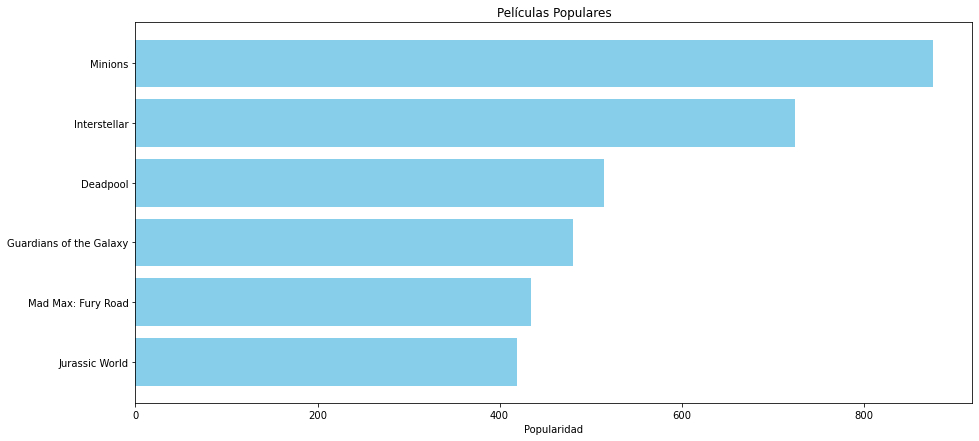

In [22]:
#Ordenamos las peliculas en función de la popularidad

import matplotlib.pyplot as plt

popularidad = df2.sort_values('popularity', ascending = False)

plt.figure(figsize = (15,7))

plt.barh(popularidad['title'].head(6), popularidad['popularity'].head(6), align = 'center', color = 'skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Popularidad')
plt.title('Películas Populares');

Los recomendadores demográficos proporcionan un cuadro general de películas recomendadas a todos los usuarios. No son sensibles a los intereses y gustos de un usuario en particular.

### Filtrado Basado en el Contenido

En este sistema de recomendación, el contenido de la película (visión general, el reparto, el equipo, la palabra clave, el eslogan, etc.) se utiliza para encontrar su similitud con otras películas. Luego se recomiendan las películas que tienen más probabilidades de ser similares.

In [23]:
# Comprobacion de la informacion del apartado overview

df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Para el proceseamiento de texto antes se necesita vectorizar las palabras. Se calculara la Frecuencia de Término del Documento Inverso (TF-IDF) por cada resumen. La frecuencia de término, es la frecuencia relativa de una palabra en un documento y se da como (instancias de término/existencias totales). La Frecuencia Inversa de Documentos es el conteo relativo de documentos que contienen el término se da como log(número de documentos/documentos con término) La importancia global de cada palabra para los documentos en los que aparecen es igual a TF * IDF.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# Definicion de Tf IDf Vectorizer Object

TfIdf = TfidfVectorizer(stop_words = 'english')

# Remplazamos Nan

df2['overview'] = df2['overview'].fillna(' ')

# Construinos la matriz TF-IDF necesaria ajustando y transformando los datos

TfIdf_matrix = TfIdf.fit_transform(df2['overview'])

# Tamaño de la nueva matriz

TfIdf_matrix.shape

(4803, 20978)

Vemos que se usaron más de 20.000 palabras diferentes para describir las 4.800 películas de nuestro conjunto de datos.

Usaremos la similitud de los cosenos para calcular una cantidad numérica que denote la similitud entre dos películas. Como hemos usado el vectorizador TF-IDF, el cálculo del producto del punto nos dará directamente la puntuación de similitud del coseno.

In [26]:
from sklearn.metrics.pairwise import linear_kernel

In [27]:
# Creacion de una matriz de similitud de cosenos

sim_coseno = linear_kernel(TfIdf_matrix, TfIdf_matrix)

Vamos a definir una función que toma el título de una película como entrada y la salida es una lista de las 10 películas más similares. 

Necesitamos un mecanismo para identificar el índice de una película en nuestro DataFrame, dado su título.

In [28]:
# Creacion de un mapa inverso de indices y titulos de peliculas

indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [29]:
# Creacion de la funcion de recomendacion de peliculas en funciom de un input y cracion de un output de 10 peliculas similares

def obt_recomendaciones(title, sim_coseno=sim_coseno):
    # Obtener el índice de la película dado su título.
    idx = indices[title]
    
    # Obtener la lista de puntajes de similitud de coseno para esa película en particular con todas las películas.
    sim_scores = list(enumerate(sim_coseno[idx]))
    
    # Ordena la lista de tuplas mencionada en base a las puntuaciones de similitud; es decir, el segundo elemento.
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Obtener los 10 primeros elementos de esta lista. Ignore el primer elemento en lo que se refiere a sí mismo
    sim_scores = sim_scores[1 : 11]
    
    # Consigue los índices de las películas
    indice_pelicula = [i[0] for i in sim_scores]
    
    # Devuelva las 10 películas más similares
    return df2['title'].iloc[indice_pelicula]

In [30]:
obt_recomendaciones('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [31]:
obt_recomendaciones('Shanghai Calling')

2027             I Am Sam
1796             Brothers
4241            The Salon
2573       Nowhere to Run
1949           Love Ranch
2017                Ghost
1369            Cape Fear
39           TRON: Legacy
1480    Big Momma's House
111          Transformers
Name: title, dtype: object

Aunque nuestro sistema ha hecho un trabajo decente para encontrar películas con descripciones de trama similares, la calidad de las recomendaciones no es tan grande. "The Dark Knight Rises" devuelve todas las películas de Batman mientras que es más probable que la gente que le gustó esa película esté más inclinada a disfrutar de otras películas de Christopher Nolan. Esto es algo que no puede ser capturado por el sistema actual.

In [32]:
obt_recomendaciones('Batman Forever')

3                         The Dark Knight Rises
119                               Batman Begins
65                              The Dark Knight
428                              Batman Returns
210                              Batman & Robin
3854    Batman: The Dark Knight Returns, Part 2
1359                                     Batman
4343                                   Cry_Wolf
174                         The Incredible Hulk
9            Batman v Superman: Dawn of Justice
Name: title, dtype: object

#### Recomendador basado en Créditos, Géneros y Palabras Claves

Créditos, Géneros y Palabras Clave Basados en Recomendaciones
No hace falta decir que la calidad de nuestro recomendador se incrementaría con el uso de mejores metadatos. Eso es exactamente lo que vamos a hacer en esta sección. Vamos a construir un recomendador basado en los siguientes metadatos: los 3 actores principales, el director, los géneros relacionados y las palabras clave de la trama de la película.

De las características del reparto, el equipo y las palabras clave, necesitamos extraer los tres actores más importantes, el director y las palabras clave asociadas a esa película. En este momento, nuestros datos están presentes en forma de listas "encadenadas", necesitamos convertirlas en una estructura segura y utilizable

In [33]:
# Construt an object from a string

from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)


In [34]:
# Consigue el nombre del director de la película de la tripulación. Si el director no aparece en la lista, devuelve a NaN

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [35]:
# Devuelve los 3 primeros elementos de la lista o la lista completa

def get_lista(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        
        #Comprobamos si existen más de tres elementos. Si es asi, coge los tres primeros, si no, devuelve la lista entera
        if len(names) > 3:
            names = names[:3]
            
        return names
    
    # Devuelve la lista vacia en caso de missings
    return []

In [36]:
# Definir el nuevo director, el elenco, los géneros y las palabras clave características que están en una forma adecuada.

df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(get_lista)


In [37]:
# Nuevas features

df2[['title', 'cast', 'director', 'keywords', 'genres']].head()

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                               cast           director  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]      James Cameron   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]     Gore Verbinski   
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]         Sam Mendes   
3      [Christian Bale, Michael Caine, Gary Oldman]  Christopher Nolan   
4    [Taylor Kitsch, Lynn Collins, Samantha Morton]     Andrew Stanton   

                                keywords                                genres  
0     [culture clash, future, space war]          [Action, Adventure, Fantasy]  
1     [ocean, drug abuse, exotic island]          [Adventure, Fantasy, Action]  
2    [spy, based on novel, secret agent]            [Action, Adventure, Crime]  
3  [dc comics, crime fighter, terrorist]                [Action, Crime, Drama]  
4      [based on novel, mars, medallion]  [Action, Adventure, Science Fiction]

Pasaremos las palabras claves a minúsculas y quitaremos los espacios entre ellas. Esto permitira que dos directores con el mismo nombre los clasifique como las misma persona 

In [38]:
# Función para convertir todas las letras en minúsculas y quitar los espacios en los directores

def limpia_datos(x):
    if isinstance(x, list):
        return[str.lower(i.replace(' ', '')) for i in x]
    else:
        #  #Comprueba si el director existe. Si no, devuelva el string vacío
        if isinstance(x, str): 
            return str.lower(x.replace(' ', ''))
        else:
            return ''

In [39]:
# Aplicamos la función de limpieza de datos a las features

features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(limpia_datos)

Creamos la "sopa de metadatos", que es una cadena que contiene todos los metadatos que queremos alimentar a nuestro vectorizador (es decir, actores, director y palabras clave).

In [40]:
def creacion_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df2['soup'] = df2.apply(creacion_soup, axis = 1)

Usamos el CountVectorizer()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
cv = CountVectorizer(stop_words = 'english')
count_matrix = cv.fit_transform(df2['soup'])

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
# Calcular la matriz de similitud de coseno basada en la count_matrix

sim_coseno2 = cosine_similarity(count_matrix, count_matrix)

In [45]:
# Reajustar el índice de nuestro DataFrame principal y construir un mapa inverso como antes

df2 = df2.reset_index()
indices = pd.Series(df2.index, index = df2['title'])

In [46]:
obt_recomendaciones('The Dark Knight Rises', sim_coseno2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [47]:
obt_recomendaciones('The Godfather', sim_coseno2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

In [48]:
obt_recomendaciones('Batman Forever', sim_coseno2)

210                         Batman & Robin
4638              Amidst the Devil's Wings
303                               Catwoman
1359                                Batman
3                    The Dark Knight Rises
9       Batman v Superman: Dawn of Justice
10                        Superman Returns
14                            Man of Steel
65                         The Dark Knight
72                           Suicide Squad
Name: title, dtype: object

Vemos que nuestro recomendador ha tenido éxito en la captura de más información debido a más metadatos y nos ha dado (posiblemente) mejores recomendaciones. Es más probable que a los fans de Marvels o de DC comics les gusten las películas de la misma productora. Por lo tanto, a las características anteriores podemos añadir production_company . También podemos aumentar el peso del director , añadiendo la característica varias veces en la sopa.

### Filtro de Colaboración 

Nuestro motor basado en el contenido sufre de algunas limitaciones severas. Sólo es capaz de sugerir películas cercanas a una determinada película. Es decir, no es capaz de captar los gustos y proporcionar recomendaciones a través de los géneros.

Además, el motor que construimos no es realmente personal en el sentido de que no captura los gustos personales y los prejuicios de un usuario. Cualquiera que pregunte a nuestro motor por recomendaciones basadas en una película recibirá las mismas recomendaciones para esa película, sin importar quién sea.

Sin embargo, el filtrado colaborativo se basa en dos tipos:

- **Filtro basado en el usario:** Estos sistemas recomiendan productos a un usuario que le han gustado a usuarios similares. Para medir la similitud entre dos usuarios podemos usar la correlación de Pearson o la similitud de coseno. Este tipo de filtrado es simple, y sufre varios problemas. Uno de ellos es que las preferencias de los usuarios pueden cambiar a lo largo del tiempo.

- **Filtro basado en artículos:** recomienda artículos basados en su similitud con los artículos que el usuario objetivo calificó. De la misma manera, la similitud puede ser calculada con la Correlación Pearson o la Similitud de Coseno. El problema de este tipo de filtrado es la escalabilidad hacia otras películas.


#### Descomposición de un solo valor

Esencialmente, queremos convertir el problema de recomendación en un problema de optimización. Podemos verlo como lo buenos que somos en la predicción de la calificación de los artículos dados a un usuario. Una métrica común es el error cuadrado medio de la raíz (RMSE). Cuanto más bajo es el RMSE, mejor es el rendimiento.

La DSV disminuye la dimensión de la matriz de utilidad extrayendo sus factores latentes. Esencialmente, mapeamos cada usuario y cada artículo en un espacio latente con la dimensión *r*. Por lo tanto, nos ayuda a comprender mejor la relación entre los usuarios y los artículos a medida que se vuelven directamente comparables.

In [49]:
#!pip install surprise

In [50]:
from surprise import Reader, Dataset, SVD, accuracy

reader = Reader()

ratings = pd.read_csv('ratings_small.csv')
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [51]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [52]:
ratings.describe()

userId        movieId         rating     timestamp
count  100004.000000  100004.000000  100004.000000  1.000040e+05
mean      347.011310   12548.664363       3.543608  1.129639e+09
std       195.163838   26369.198969       1.058064  1.916858e+08
min         1.000000       1.000000       0.500000  7.896520e+08
25%       182.000000    1028.000000       3.000000  9.658478e+08
50%       367.000000    2406.500000       4.000000  1.110422e+09
75%       520.000000    5418.000000       4.000000  1.296192e+09
max       671.000000  163949.000000       5.000000  1.476641e+09

In [53]:
from surprise.model_selection import KFold

data2 = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

kf = KFold(n_splits=5)

In [54]:
svd = SVD()

for trainset, testset in kf.split(data2):

    # train and test algorithm.
    svd.fit(trainset)
    predictions = svd.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9008
RMSE: 0.8913
RMSE: 0.8973
RMSE: 0.8947
RMSE: 0.8930


In [55]:
from surprise.model_selection import cross_validate

cross_validate(svd, data2, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8878  0.9004  0.9045  0.8992  0.8929  0.8970  0.0059  
MAE (testset)     0.6834  0.6926  0.6953  0.6911  0.6899  0.6905  0.0040  
Fit time          4.34    4.26    5.14    7.71    5.28    5.35    1.25    
Test time         0.12    0.27    0.41    0.26    0.11    0.23    0.11    


{'test_rmse': array([0.88777922, 0.90044949, 0.90452508, 0.89916571, 0.89292105]),
 'test_mae': array([0.68337606, 0.69261468, 0.69529084, 0.6911091 , 0.6899151 ]),
 'fit_time': (4.343426942825317,
  4.260067701339722,
  5.143864154815674,
  7.7122108936309814,
  5.276451826095581),
 'test_time': (0.11711883544921875,
  0.2689342498779297,
  0.4120020866394043,
  0.2639579772949219,
  0.10985803604125977)}

In [56]:
ratings[ratings['userId'] == 1]

userId  movieId  rating   timestamp
0        1       31     2.5  1260759144
1        1     1029     3.0  1260759179
2        1     1061     3.0  1260759182
3        1     1129     2.0  1260759185
4        1     1172     4.0  1260759205
5        1     1263     2.0  1260759151
6        1     1287     2.0  1260759187
7        1     1293     2.0  1260759148
8        1     1339     3.5  1260759125
9        1     1343     2.0  1260759131
10       1     1371     2.5  1260759135
11       1     1405     1.0  1260759203
12       1     1953     4.0  1260759191
13       1     2105     4.0  1260759139
14       1     2150     3.0  1260759194
15       1     2193     2.0  1260759198
16       1     2294     2.0  1260759108
17       1     2455     2.5  1260759113
18       1     2968     1.0  1260759200
19       1     3671     3.0  1260759117

In [57]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=1343, r_ui=2, est=2.7668806410617384, details={'was_impossible': False})

Para la película con ID 302, tenemos una predicción estimada de 2.618. Una característica sorprendente de este sistema de recomendación es que no le importa qué es la película (o qué contiene). Funciona puramente en base a un ID de película asignado e intenta predecir las clasificaciones en base a cómo los otros usuarios han predicho la película.

In [58]:
svd.predict(10, 1343, 2)

Prediction(uid=10, iid=1343, r_ui=2, est=3.9140321632255155, details={'was_impossible': False})

In [59]:
svd.predict(1, 1029, 3)

Prediction(uid=1, iid=1029, r_ui=3, est=2.819281669766389, details={'was_impossible': False})

In [60]:
svd.predict(1, 1953)

Prediction(uid=1, iid=1953, r_ui=None, est=3.1922185718766984, details={'was_impossible': False})

In [61]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.8930


0.8930299750589491

-------------

In [62]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data2, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8938


0.8937647973143952

---------------------

In [63]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV


param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data2)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9136870710688028
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


----------

#### LightFM

In [64]:
#!pip install LightFM

In [65]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

/opt/anaconda3/lib/python3.8/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [66]:
movies = pd.read_csv('movies_metadata.csv')
movies = movies.drop([19730, 29503, 35587])

movies['id'] = movies['id'].astype('int')
movies.head(2)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   

                               homepage    id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story   862  tt0114709                en   
1                                   NaN  8844  tt0113497                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1        Jumanji  When siblings Judy and Peter discover an encha...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                                     tagline      title  video vote_average  \
0                                        NaN  Toy Story  False          7.7   
1  Roll the dice and unleash the excitement!    Jumanji  False          6.9   

  vote_count  
0     5415.0  
1     2413.0  

[2 rows x 24 columns]

In [67]:
data = pd.read_csv('ratings_small.csv')
data = data[data['movieId'].isin(movies['id'])]
data = data[['userId','movieId','rating']]
data.head()

userId  movieId  rating
10       1     1371     2.5
11       1     1405     1.0
13       1     2105     4.0
15       1     2193     2.0
16       1     2294     2.0

In [68]:
interactions = data.groupby(['userId', 'movieId'])['rating'].sum().unstack().reset_index().fillna(0).set_index('userId')
    
interactions.head()
interactions.shape

(671, 2830)

In [69]:
# Función para crear un diccionario de usuario basado en su índice y número en el conjunto de datos de la interacción; 
user_id = list(interactions.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1

# Función para crear un diccionario de artículos basado en su ID de artículo y nombre de artículo
movies = movies.reset_index()
item_dict ={}
for i in range(movies.shape[0]):
    item_dict[(movies.loc[i,'id'])] = movies.loc[i,'original_title']

In [70]:
item_dict[5]

'Four Rooms'

In [71]:
from scipy import sparse

# Función para ejecutar el algoritmo de factorización de la matriz

x = sparse.csr_matrix(interactions.values)
model = LightFM(no_components= 150, loss='warp')
model.fit(x,epochs=3000,num_threads = 4)

In [72]:
# Evaluacion del entrenamiento
k = 10
print('Precisión de train de k={}:\t{:.4f}'.format(k, precision_at_k(model, x, k=k).mean()))

Precisión de train de k=10:	0.9849


In [73]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 10, show = True):
    '''
    Función para producir recomendaciones para el usuario
    Entrada obligatoria - 
        - modelo = Modelo de factorización de matriz entrenada
        - interacciones = conjunto de datos utilizados para el entrenamiento del modelo
        - user_id = ID de usuario para el cual necesitamos generar una recomendación
        - user_dict = Entrada de tipo de diccionario que contiene interaction_index como clave y user_id como valor
        - item_dict = Entrada de tipo de diccionario que contiene item_id como clave y item_name como valor
        - umbral = valor por encima del cual la calificación es favorable en la nueva matriz de interacción
        - nrec_items = Número de recomendación de salida necesaria
    Salida esperada - 
        - Imprime la lista de artículos que el usuario dado ya ha comprado
        - Imprime una lista de los N artículos recomendados que se espera que el usuario esté interesado en
    '''
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index) \
                                .sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print("Gustos conocidos:")
        counter = 1
        for i in known_items:
            #print(i)
            print(str(counter) + '- ' + i)
            counter+=1

        print("\nPelículas recomendadas:")
        counter = 1
        for i in scores:
            #print(i)
            print(str(counter) + '- ' + i)
            counter+=1
    return return_score_list

In [74]:
## Calling 10 movie recommendation for user id 11
rec_list = sample_recommendation_user(model = model, 
                                      interactions = interactions, 
                                      user_id = 11, 
                                      user_dict = user_dict,
                                      item_dict = item_dict, 
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

Gustos conocidos:
1- La Chienne
2- Cutthroat Island
3- Dawn of the Dead
4- Les Vacances de Monsieur Hulot
5- Terminator 3: Rise of the Machines

Películas recomendadas:
1- Savior
2- Or
3- Ring of Fire II: Blood and Steel
4- Million Dollar Baby
5- Predator 2
6- Heart of the Country
7- Young and Innocent
8- ...Più forte ragazzi!
9- Breaking the Waves
10- Beat


In [75]:
def sample_recommendation_item(model,interactions,item_id,user_dict,item_dict,number_of_user):
    '''
    Función para producir una lista de los N usuarios más interesados en un artículo determinado
    Entrada obligatoria -
        - modelo = Modelo de factorización de matriz entrenada
        - interacciones = conjunto de datos utilizados para el entrenamiento del modelo
        - item_id = ID del artículo para el cual necesitamos generar usuarios recomendados
        - user_dict = Entrada de tipo de diccionario que contiene interaction_index como clave y user_id como valor
        - item_dict = Entrada de tipo de diccionario que contiene item_id como clave y item_name como valor
        - number_of_user = Número de usuarios necesarios como salida
    Salida esperada -
        - user_list = Lista de usuarios recomendados 
    '''
    n_users, n_items = interactions.shape
    x = np.array(interactions.columns)
    scores = pd.Series(model.predict(np.arange(n_users), np.repeat(x.searchsorted(item_id),n_users)))
    user_list = list(interactions.index[scores.sort_values(ascending=False).head(number_of_user).index])
    return user_list 


## Calling 15 user recommendation for item id 1
sample_recommendation_item(model = model,
                           interactions = interactions,
                           item_id = 1,
                           user_dict = user_dict,
                           item_dict = item_dict,
                           number_of_user = 15)

[151, 369, 188, 506, 279, 440, 161, 662, 47, 192, 32, 535, 82, 513, 338]

In [76]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

def create_item_emdedding_distance_matrix(model,interactions):
    '''
    Función para crear una matriz de incrustación de distancia entre el artículo y el elemento
    Entrada obligatoria -
        - modelo = Modelo de factorización de matriz entrenada
        - interacciones = conjunto de datos utilizados para el entrenamiento del modelo
    Salida esperada -
        - item_emdedding_distance_matrix = Marco de datos de Pandas que contiene la matriz de distancia coseno b/n items
    '''
    df_item_norm_sparse = sparse.csr_matrix(model.item_embeddings)
    similarities = cosine_similarity(df_item_norm_sparse)
    item_emdedding_distance_matrix = pd.DataFrame(similarities)
    item_emdedding_distance_matrix.columns = interactions.columns
    item_emdedding_distance_matrix.index = interactions.columns
    return item_emdedding_distance_matrix

## Creando una matriz de distancia película-película
item_item_dist = create_item_emdedding_distance_matrix(model = model,
                                                       interactions = interactions)


In [77]:
def item_item_recommendation(item_emdedding_distance_matrix, item_id, 
                             item_dict, n_items = 10, show = True):
    '''
    Función de creación de recomendación de artículos
    Entrada obligatoria - 
        - item_emdedding_distance_matrix = Marco de datos de Pandas que contiene la matriz de distancia coseno b/n items
        - item_id = ID del artículo para el cual necesitamos generar los artículos recomendados
        - item_dict = Entrada de tipo de diccionario que contiene item_id como clave y item_name como valor
        - n_items = Número de artículos necesarios como salida
    Salida esperada -
        - recommended_items = Lista de artículos recomendados
    '''
    
    recommended_items = list(pd.Series(item_emdedding_distance_matrix.loc[item_id,:]. \
                                  sort_values(ascending = False).head(n_items+1). \
                                  index[1:n_items+1]))
    if show == True:
        print("Película de interés :{0}".format(item_dict[item_id]))
        print("Una película similar al anterior:")
        counter = 1
        for i in recommended_items:
            print(str(counter) + '- ' +  item_dict[i])
            counter+=1
    return recommended_items

## Calling 10 recommended items for item id 
rec_list = item_item_recommendation(item_emdedding_distance_matrix = item_item_dist,
                                    item_id = 6,
                                    item_dict = item_dict,
                                    n_items = 10)

Película de interés :Judgment Night
Una película similar al anterior:
1- Death Line
2- Armageddon
3- Terminator 3: Rise of the Machines
4- Men in Black II
5- M
6- The Fifth Element
7- Almost Famous
8- Lock, Stock and Two Smoking Barrels
9- Rain Man
10- Before Sunrise


#### Hibrido

In [78]:
item_features = count_matrix

x = sparse.csr_matrix(interactions.values)
model = LightFM(no_components= 15, loss='warp',k=5)
model.fit(x,item_features=item_features,epochs=4,num_threads = 2)

In [79]:
## Calling 10 movie recommendation for user id 2
rec_list = sample_recommendation_user(model = model, 
                                      interactions = interactions, 
                                      user_id = 2, 
                                      user_dict = user_dict,
                                      item_dict = item_dict, 
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

Gustos conocidos:
1- The Conversation
2- The Hours
3- Monsters, Inc.
4- The Poseidon Adventure
5- Le Mépris
6- Lili Marleen
7- Berlin: Die Sinfonie der Grosstadt
8- 48 Hrs.
9- The Dark

Películas recomendadas:
1- Five Bloody Graves
2- Beverly Hills Cop II
3- While You Were Sleeping
4- Dorian Blues
5- The Terminal
6- The Pianist
7- Rebecca
8- Love, Cheat & Steal
9- Tom and Jerry: Shiver Me Whiskers
10- La Ley del Deseo
